# Sheet 06

Welcome to Sheet 05

## Task 6.1

- a)
First attempt in QuIDE (the software kept crashing on M1, impossible to work with 🥺):

Second attempt in Quiskit:

In [2]:
import math

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator, Aer
import numpy as np

In [215]:
def circuit(num_iterations):
    num_qubits = 3
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit

    qc = QuantumCircuit(total_qubits)


    qc.x(num_qubits)
    qc.h(range(num_qubits+1))

    def oracle(circuit):
        circuit.mcx(list(range(num_qubits-1)), num_qubits-1)

    def grover_iteration(circuit):
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc.h(range(num_qubits))
        qc.x(range(num_qubits))
        qc.h(num_qubits-1)
        oracle(qc)
        qc.h(num_qubits-1)
        qc.barrier()
        qc.x(range(num_qubits))
        qc.h(range(num_qubits))

    for _ in range(num_iterations):
        grover_iteration(qc)

    return qc

### For 1 Grover's Iteration

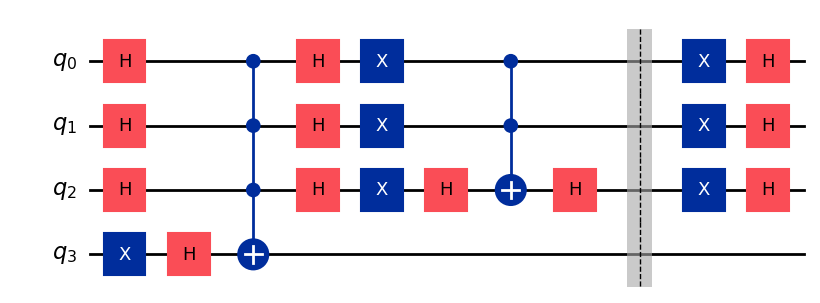

In [218]:
num_qubits = 3
num_iterations = int(np.pi / 4 * np.sqrt(2**num_qubits))

qc = circuit(num_iterations-1) # with 1 Grover iteration
qc2 = circuit(num_iterations) # with 2 Grover iteration

qc.draw("mpl")

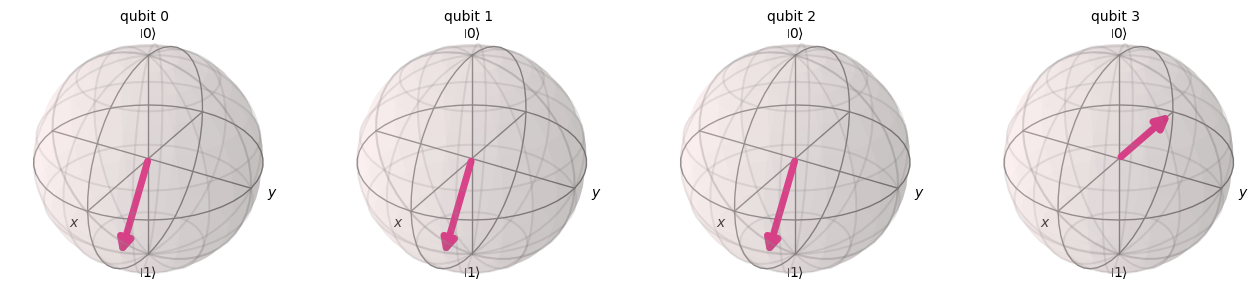

In [4]:
plot_bloch_multivector(qc)

### For 2 Grover's Iteration

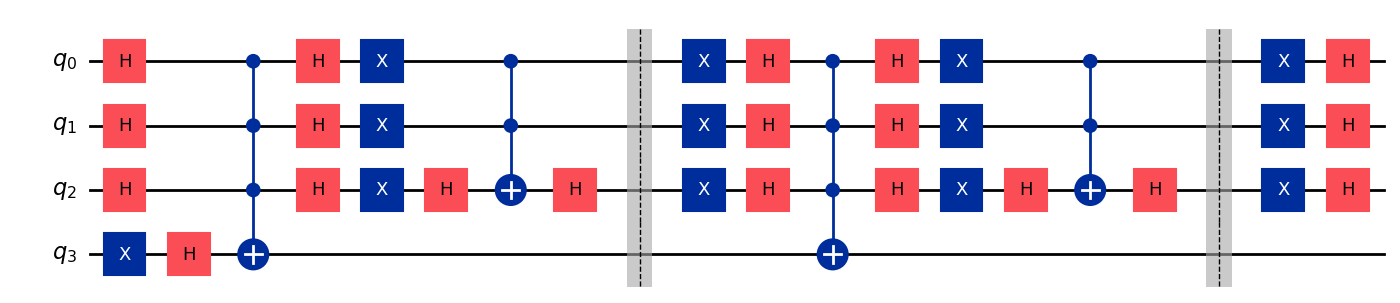

In [5]:
qc2.draw("mpl")

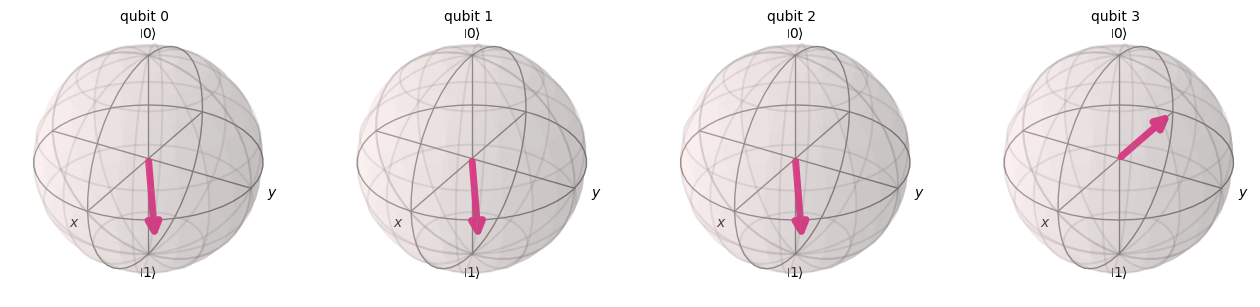

In [6]:
plot_bloch_multivector(qc2)

### After 1 Grover's Iteration

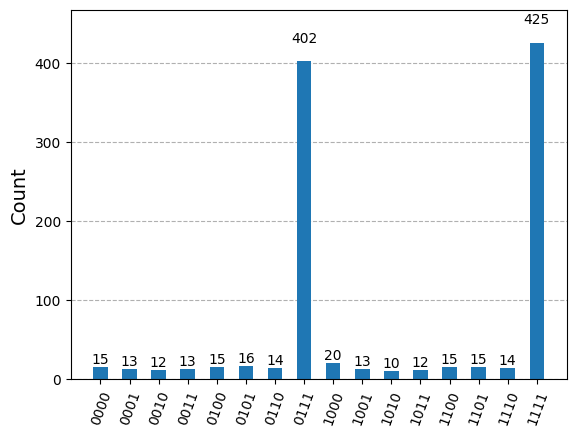

In [7]:
# Measure the qubits
qc.measure_all()

sim = AerSimulator()
result = sim.run(qc).result()
plot_histogram(result.get_counts(0))

### After 2 Grover's Iteration

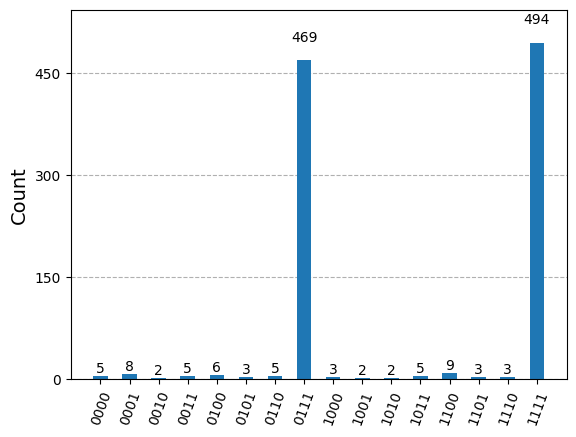

In [8]:
# Measure the qubits
qc2.measure_all()

sim = AerSimulator()
result = sim.run(qc2).result()
plot_histogram(result.get_counts(0))

In [219]:
backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc2)
statevector = job.result().get_statevector()

statevector

Statevector([-0.0625+1.53080850e-16j, -0.0625+1.37772765e-16j,
             -0.0625+1.37772765e-16j, -0.0625+1.22464680e-16j,
             -0.0625+1.60734892e-16j, -0.0625+1.60734892e-16j,
             -0.0625+1.60734892e-16j,  0.6875-8.49598717e-16j,
              0.0625-1.53080850e-16j,  0.0625-1.37772765e-16j,
              0.0625-1.37772765e-16j,  0.0625-1.22464680e-16j,
              0.0625-1.60734892e-16j,  0.0625-1.60734892e-16j,
              0.0625-1.60734892e-16j, -0.6875+8.49598717e-16j],
            dims=(2, 2, 2, 2))


In [6]:
def display_statevector(statevector):
    statevector = np.asarray(statevector)
    num_qubits = int(np.log2(len(statevector)))
    basis_states = [f'|{i:0{num_qubits}b})' for i in range(len(statevector) )]
    print(f"{basis_states=}")
    output = ""
    for i, amplitude in enumerate(statevector):
        if np.abs(amplitude) > 1e-10:
            if output != "":
                output += " + "
            if np.abs(amplitude.real - 1) < 1e-1 and np.abs(amplitude.imag) < 1e-1:
                output += f'{basis_states [i]}'
            elif np.abs(amplitude.real) < 1e-1 and np.abs(amplitude.imag - 1) < 1e-1:
                output += f'i{basis_states[i]}'
            elif np.abs(amplitude.imag) < 1e-1:
                output += f'({amplitude.real: .3f}){basis_states[i]}'
            else:
                amplitude_str = f'({amplitude.real:.3f} {amplitude.imag:+.3f}i)'
                output += f'{amplitude_str}{basis_states [i]}'
    return output

In [220]:
# Before measurement
display_statevector(statevector)

basis_states=['|0000)', '|0001)', '|0010)', '|0011)', '|0100)', '|0101)', '|0110)', '|0111)', '|1000)', '|1001)', '|1010)', '|1011)', '|1100)', '|1101)', '|1110)', '|1111)']


'(-0.062)|0000) + (-0.062)|0001) + (-0.062)|0010) + (-0.062)|0011) + (-0.062)|0100) + (-0.062)|0101) + (-0.062)|0110) + ( 0.687)|0111) + ( 0.062)|1000) + ( 0.062)|1001) + ( 0.062)|1010) + ( 0.062)|1011) + ( 0.062)|1100) + ( 0.062)|1101) + ( 0.062)|1110) + (-0.688)|1111)'

In [12]:
# After measurement (the cell have been executed in a DIFFERENT ORDER)
display_statevector(statevector)

basis_states=['|0000)', '|0001)', '|0010)', '|0011)', '|0100)', '|0101)', '|0110)', '|0111)', '|1000)', '|1001)', '|1010)', '|1011)', '|1100)', '|1101)', '|1110)', '|1111)']


'|0111)'

> Which element x ∈{0,..,7} is found by this 𝑓?

From the diagram, it looks like the target state is ∣111⟩, thus $x = 7$.

> How many Grover iterations are optimal here?

The number of necessary iterations is $\left\lfloor\frac\pi4\sqrt{\frac Nk}\right\rfloor $ (w/ $k=1$ as we only look for the most probable outcome)

$N=2^n$ with n qubits, the following holds:

$$\left\lfloor\frac\pi4\sqrt{8}\right\rfloor = 2$$

Thus, 2 iterations are necessary. However, even fewer iterations may be sufficient to find the solution with a high probability. *We can see that one was already enough to get a good overview of the result.*

## Task 6.2

- a) Calculate $|ψ_1⟩= H_3(|x⟩|y⟩)$ then $|ψ_2⟩= CCNOT|ψ_1⟩$, Which partial state of |x⟩ now has a negative amplitude?

$$\left|\psi_1\right\rangle=H_{n+1}\left|\psi_0\right\rangle=\left(\frac{1}{\sqrt{2^n}}\sum_{x=0}^{2^n-1}\left|x\right\rangle\right)\frac{1}{\sqrt{2}}\left(\left|0\right\rangle-\left|1\right\rangle\right)$$

$$=H_{2+1}\left|\psi_0\right\rangle=\left(\frac{1}{\sqrt{2^2}}\sum_{x=0}^{2^2-1}\left|x\right\rangle\right)\frac{1}{\sqrt{2}}\left(\left|0\right\rangle-\left|1\right\rangle\right)$$

$$=H_{3}\left|\psi_0\right\rangle=\left(\frac 12\sum_{x=0}^{3}\left|x\right\rangle\right)\frac{1}{\sqrt{2}}\left(\left|0\right\rangle-\left|1\right\rangle\right)$$


$$\begin{aligned}|\psi_2\rangle=U_{f_{\hat{x}}}\left|\psi_1\right\rangle=\left(-\frac{1}{\sqrt{N}}\left|\hat{x}\right\rangle+\frac{1}{\sqrt{N}}\sum_{\begin{array}{c}x=0\\x\neq\hat{x}\end{array}}^{N-1}\left|x\right\rangle\right)\frac{1}{\sqrt{2}}\left(\left|0\right\rangle-\left|1\right\rangle\right)\end{aligned}$$

$$\begin{aligned}|\psi_2\rangle=U_{f_{\hat{x}}}\left|\psi_1\right\rangle=\left(-\frac{1}{\sqrt{4}}\left|\hat{x}\right\rangle+\frac{1}{\sqrt{4}}\sum_{\begin{array}{c}x=0\\x\neq\hat{x}\end{array}}^{N-1}\left|x\right\rangle\right)\frac{1}{\sqrt{2}}\left(\left|0\right\rangle-\left|1\right\rangle\right)\end{aligned}$$

See notes attached.

- b) the negative amplitude moves to |00⟩

See notes attached.

- c)

> Hint: Only a circuit with one iteration is suitable for testing.

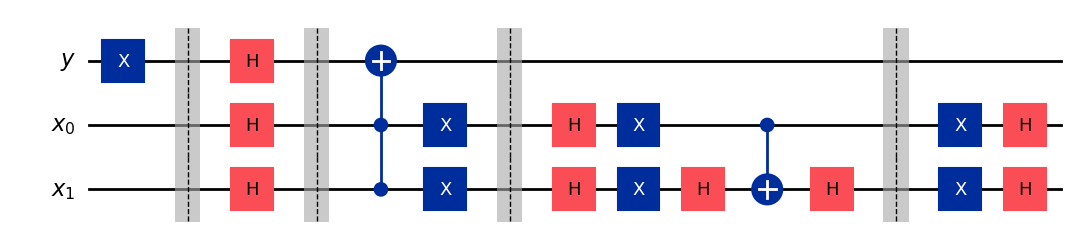

In [13]:
def circuit(num_iterations):
    num_qubits = 2
    ancilla_qubit = 1
    total_qubits = num_qubits + ancilla_qubit
    
    qr_y = QuantumRegister(1, "y")
    qr_x = QuantumRegister(2, "x")

    qc = QuantumCircuit(qr_y, qr_x)

    qc.x(0)
    qc.barrier()
    qc.h(range(num_qubits+1))
    
    qc.barrier()

    def oracle(circuit):
        circuit.mcx(list(range(1, num_qubits+1)), 0)

    def grover_iteration(circuit):
        oracle(qc)
        qc.x(range(1, num_qubits+1))
        qc.barrier()
        qc.h(range(1, num_qubits+1))
        qc.x(range(1, num_qubits+1))
        qc.h(num_qubits)
        circuit.mcx(list(range(1, num_qubits)), num_qubits)
        qc.h(num_qubits)
        qc.barrier()
        qc.x(range(1, num_qubits+1))
        qc.h(range(1, num_qubits+1))

    for _ in range(num_iterations):
        grover_iteration(qc)

    return qc

qc = circuit(num_iterations=1)

qc.draw("mpl")

In [14]:
backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)
statevector = job.result().get_statevector()

statevector

Statevector([-7.07106781e-01+3.03084620e-16j,
              7.07106781e-01-3.03084620e-16j,
              1.96261557e-17+3.30179041e-33j,
             -3.92523115e-17+3.90874223e-33j,
              1.11022302e-16+4.32978028e-17j,
             -5.55111512e-17-4.32978028e-17j,
              2.15887713e-16-1.07890958e-31j,
             -1.17756934e-16+1.00680426e-31j],
            dims=(2, 2, 2))


In [15]:
display_statevector(statevector)

basis_states=['|000)', '|001)', '|010)', '|011)', '|100)', '|101)', '|110)', '|111)']


'(-0.707)|000) + ( 0.707)|001)'

The probability of $|00>$ being 100%, we correctly incorporated the operation with which you can shift the negative amplitude in Uf after the CCNOT

## Task 6.3

- a) 4 Nodes, 2 Colors

> How many Grover iterations are optimal here?

The number of necessary iterations is $\left\lfloor\frac\pi4\sqrt{\frac Nk}\right\rfloor $ (w/ $k=1$ as we only look for the most probable outcome)

$N=2^n$ with n qubits, the following holds:

$$\left\lfloor\frac\pi4\sqrt{16}\right\rfloor = 3$$

Thus, 3 iterations are necessary. However, even fewer iterations may be sufficient to find the solution with a high probability. *We can see that one was already enough to get a good overview of the result.*

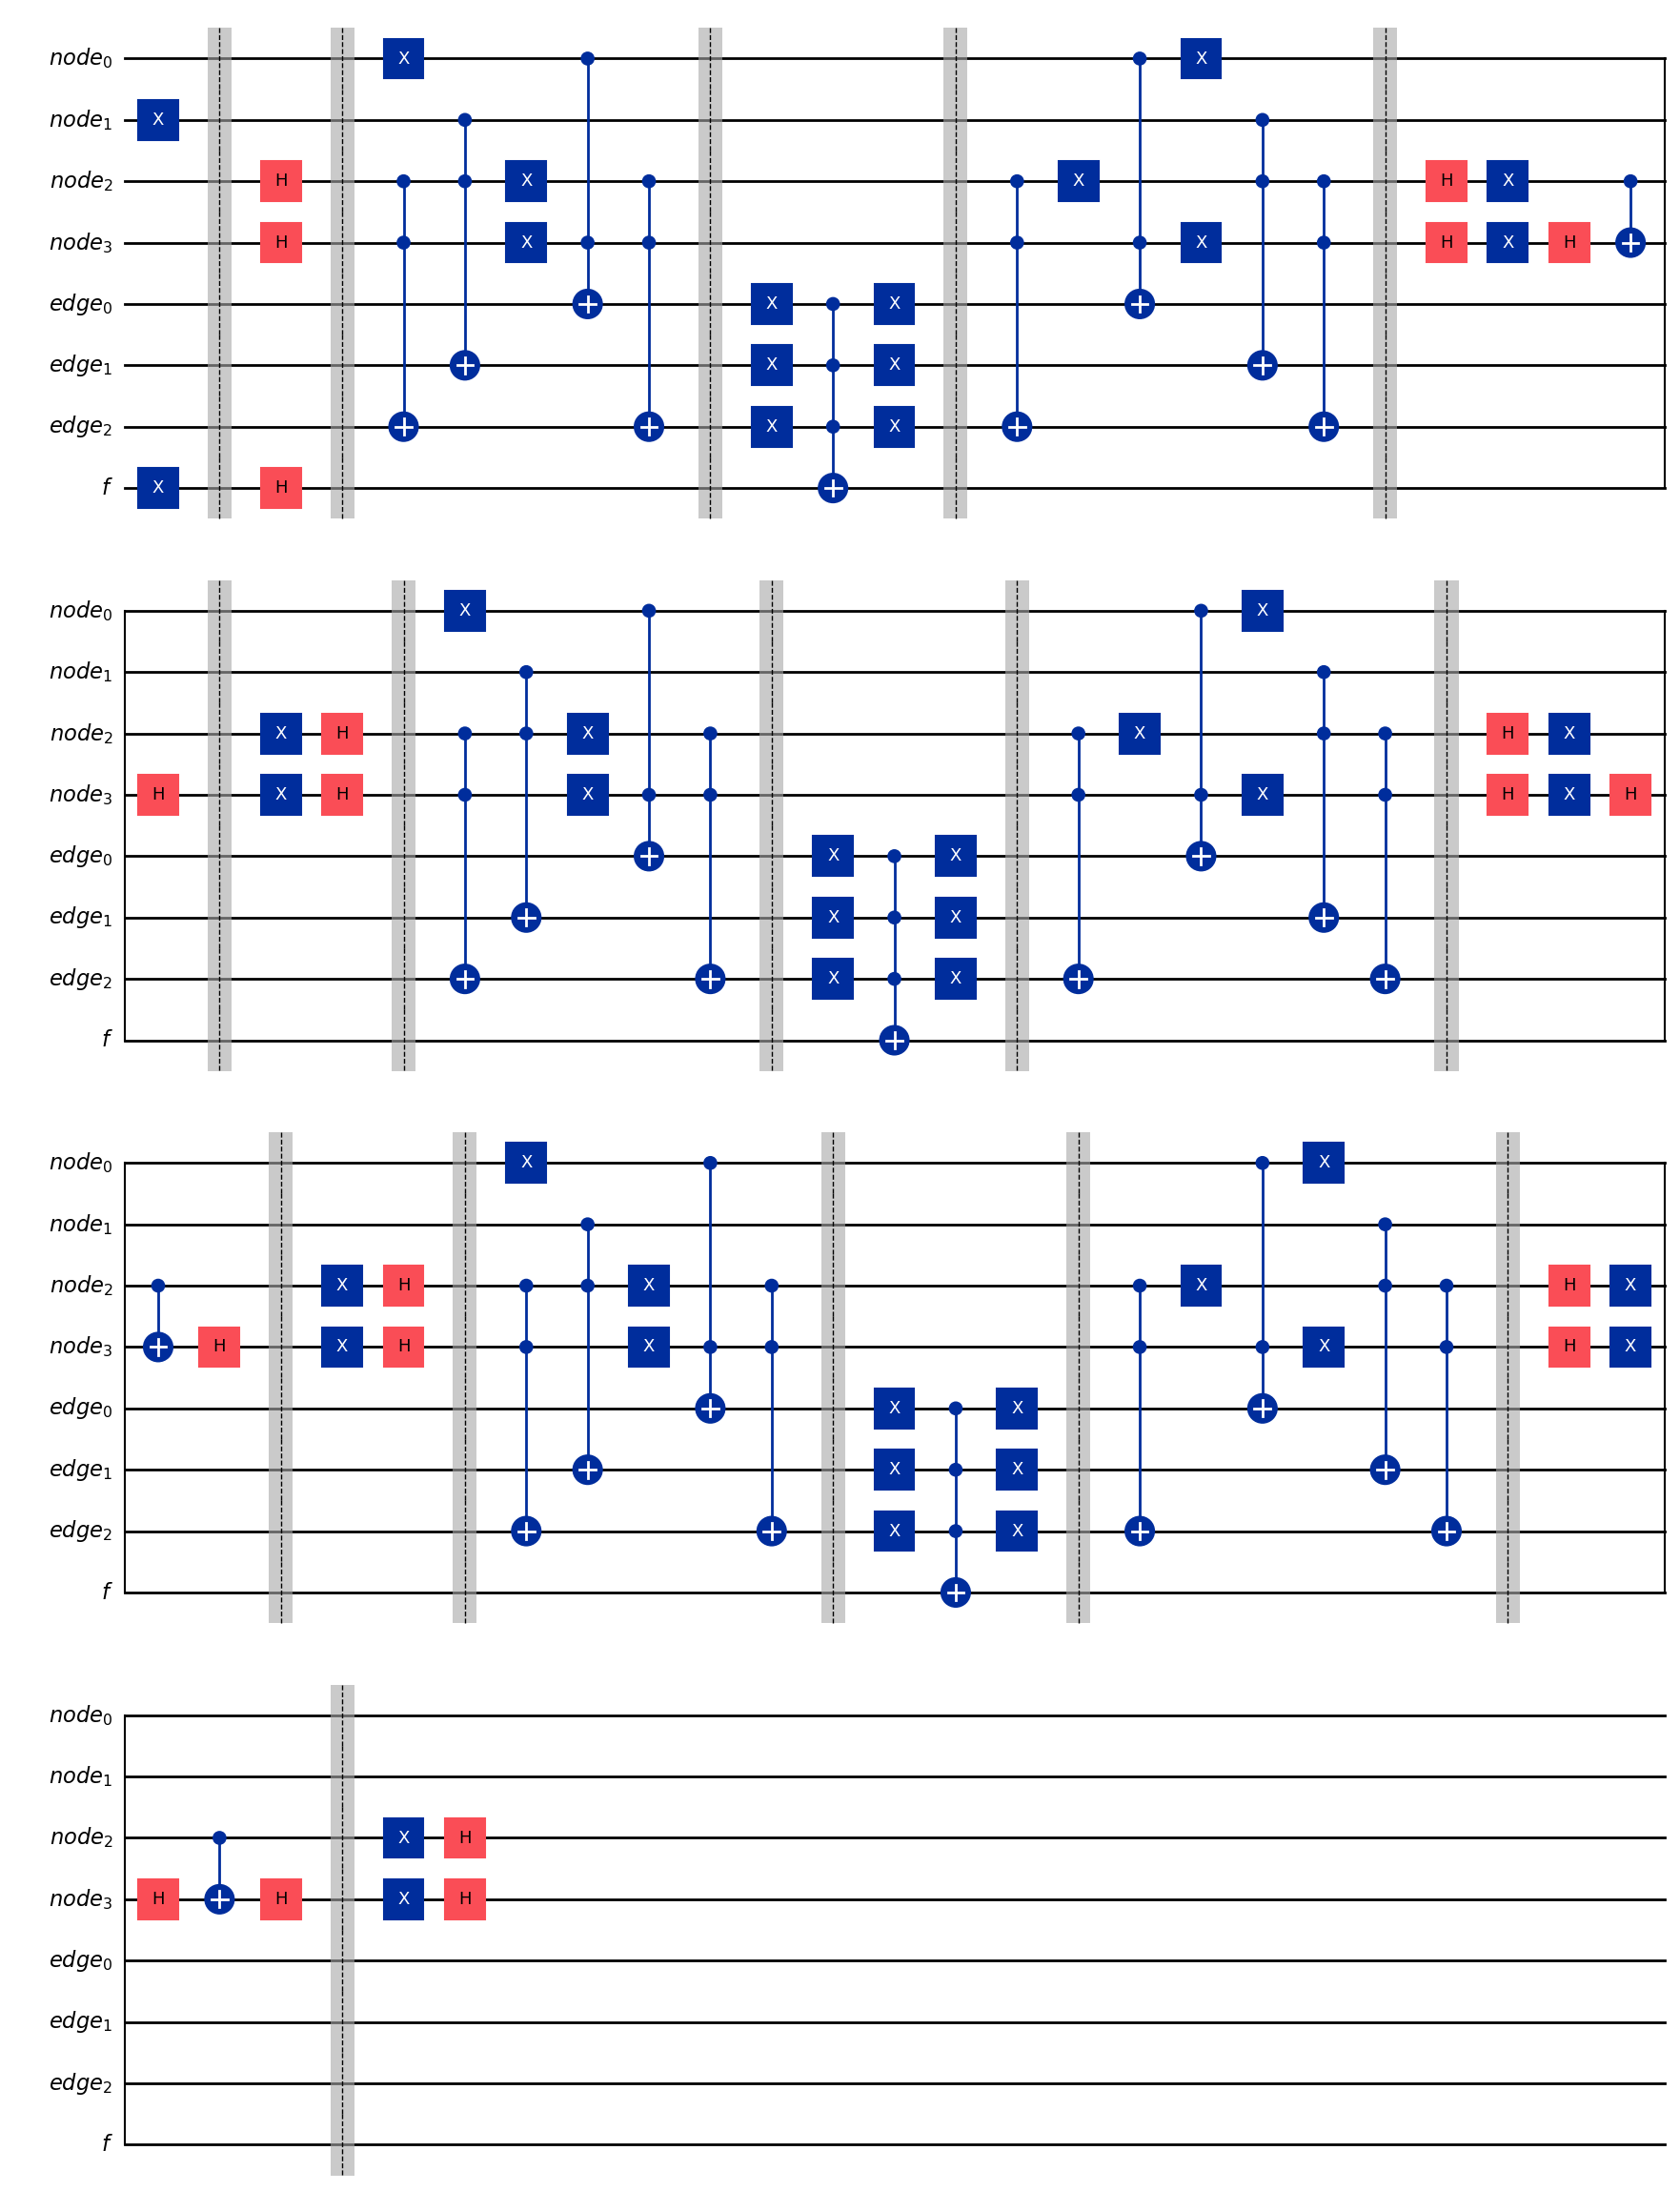

In [4]:
def circuit(num_iterations):
    last_qubit = 7
    mode_qubit = 3
    ancilla_qubit = 4
    
    qr_edge = QuantumRegister(3, "edge")
    qr_node = QuantumRegister(4, "node") # ANCILLA BITS
    qr_helper = QuantumRegister(1, "f")

    qc = QuantumCircuit(qr_node, qr_edge, qr_helper)

    qc.x(last_qubit)
    qc.x(1)
    qc.barrier()
    qc.h(last_qubit)
    
    qc.h(range(2, mode_qubit+1))

    def oracle():
        qc.x(0)
        qc.mcx([2, 3], 6)
        qc.mcx([1, 2], 5)
        qc.x([2, 3])
        qc.mcx([0, 3], 4)
        qc.mcx([2, 3], 6)
        
        qc.barrier()
        qc.x([4, 5, 6])
        qc.mcx([4, 5, 6], 7)
        qc.x([4, 5, 6])
        qc.barrier()
        
        qc.mcx([2, 3], 6)
        qc.x(2)
        qc.mcx([0, 3], 4)
        qc.x([0, 3])
        qc.mcx([1, 2], 5)
        qc.mcx([2, 3], 6)

    def grover_iteration(circuit):
        qc.barrier()
        oracle()
        qc.barrier()
        
        qc.h(range(2, mode_qubit+1))
        qc.x(range(2, mode_qubit+1))
        qc.h(mode_qubit)
        circuit.mcx(list(range(2, mode_qubit)), mode_qubit)
        qc.h(mode_qubit)
        qc.barrier()
        qc.x(range(2, mode_qubit+1))
        qc.h(range(2, mode_qubit+1))



    for _ in range(num_iterations):
        grover_iteration(qc)

    return qc

qc = circuit(num_iterations=3)

qc.draw("mpl")

In [7]:
qc = circuit(num_iterations=1)

backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)
statevector = job.result().get_statevector()

display_statevector(statevector)

basis_states=['|00000000)', '|00000001)', '|00000010)', '|00000011)', '|00000100)', '|00000101)', '|00000110)', '|00000111)', '|00001000)', '|00001001)', '|00001010)', '|00001011)', '|00001100)', '|00001101)', '|00001110)', '|00001111)', '|00010000)', '|00010001)', '|00010010)', '|00010011)', '|00010100)', '|00010101)', '|00010110)', '|00010111)', '|00011000)', '|00011001)', '|00011010)', '|00011011)', '|00011100)', '|00011101)', '|00011110)', '|00011111)', '|00100000)', '|00100001)', '|00100010)', '|00100011)', '|00100100)', '|00100101)', '|00100110)', '|00100111)', '|00101000)', '|00101001)', '|00101010)', '|00101011)', '|00101100)', '|00101101)', '|00101110)', '|00101111)', '|00110000)', '|00110001)', '|00110010)', '|00110011)', '|00110100)', '|00110101)', '|00110110)', '|00110111)', '|00111000)', '|00111001)', '|00111010)', '|00111011)', '|00111100)', '|00111101)', '|00111110)', '|00111111)', '|01000000)', '|01000001)', '|01000010)', '|01000011)', '|01000100)', '|01000101)', '|0100

'(-0.707)|00001010) + ( 0.707)|10001010)'

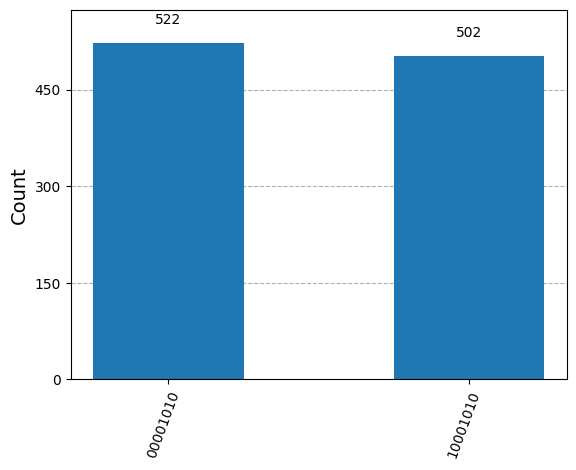

In [8]:
# Measure the qubits
qc.measure_all()

sim = AerSimulator()
result = sim.run(qc).result()
plot_histogram(result.get_counts(0))

As we can see, the problem is solved with a probability to measure the state of $|....1010>$ at 100%

$|1010>$ means that:
 - Node 0: Blue
 - Node 1: Yellow
 - Node 2: Blue
 - Node 3: Yellow